In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor   #jeden z najprostszych modeli, drzewo decyzyjne
from sklearn.metrics import mean_absolute_error  #sposób mierzenia sukcesu
from sklearn.model_selection import cross_val_score

In [4]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix/dw_matrix


In [0]:
df = pd.read_csv('data/women_shoes.csv')
df.shape

(18001, 47)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [0]:
#chcemy zacząć prognozować cene buta w zależności od jakiegoś parametru
mean_price = np.mean(df['prices_amountmin'])  #średnia wartość z danego zbioru - tu cena
mean_price

80.91430476084132

In [0]:
y_true = df['prices_amountmin'] #wartość prawidłowa
y_pred = [mean_price] * y_true.shape[0] #wartość prognozowana

mean_absolute_error(y_true, y_pred)  #test poprawności modelu  - wynik 67 czyli średnia cena to 80 a nasz model radzi sobie +/- 67

67.18691922456821

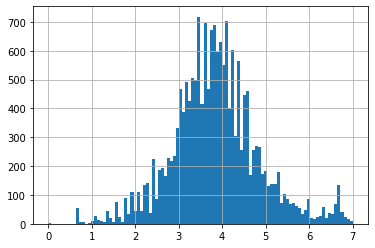

In [0]:
np.log( df['prices_amountmin'] + 1).hist(bins=100) # zamiast dodawać 1 można loglp()

In [0]:
y_true = df['prices_amountmin'] 
price_log_mean = np.expm1 (np.mean (np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0] 

mean_absolute_error(y_true, y_pred)

56.31106186683235

In [0]:
np.expm1 (np.mean (np.log1p(y_true) ) )

45.93639357116868

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.brand.value_counts() #musimy nadać konkretne ID, 

Ralph Lauren    472
Nike            366
TOMS            327
MUK LUKS        237
Easy Spirit     232
               ... 
Micahel Kors      1
Beyond Yoga       1
SAS               1
Arche             1
BP.               1
Name: brand, Length: 2090, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0] # nadajemy ID

In [0]:
feats = ['brand_cat']
x = df[ feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-51.7790224568183, 0.6800384408022533)

In [0]:

def run_model(feats):
  x = df[ feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['brand_cat'])

(-51.7790224568183, 0.6800384408022533)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
run_model(['manufacturer_cat'])

(-67.71896474272188, 3.887282618857807)

In [0]:
run_model(['manufacturer_cat', 'brand_cat'])

(-51.45401686830779, 0.8875568782863832)

In [5]:
ls

data/  day3.ipynb  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [6]:
ls matrix_one/

day03.ipynb  day4.ipynb


In [0]:
!git 